In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline

In [2]:
x = imread('slides/choropleth.jpg')
x.shape

(1053, 1923, 3)

In [3]:
from matplotlib.patches import Rectangle

In [4]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

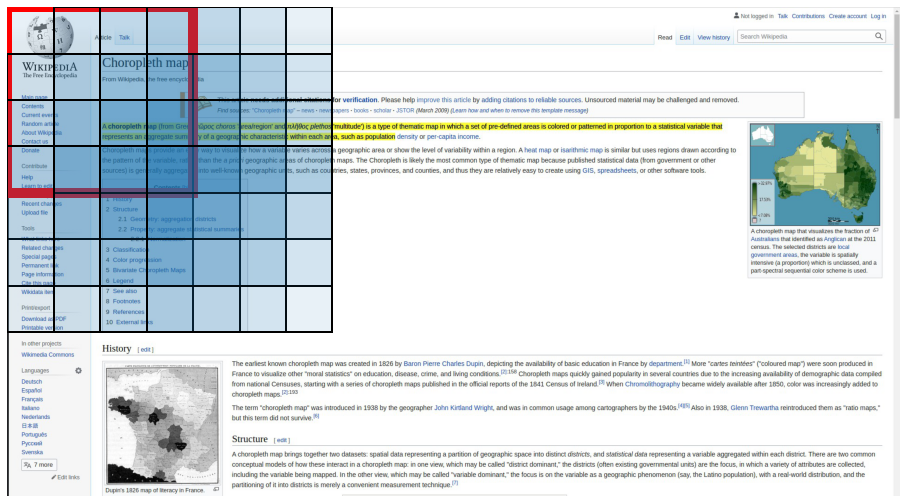

In [5]:
winsize = 400, 400
stride = 100

fig, ax = plt.subplots(figsize=(16, 18))
ax.imshow(x)

for i in range(4):
    for j in range(4):
        try:
            color = colors[i * 4 + j]
        except IndexError:
            color = colors[(i * 4 + j) % len(colors)]
        topleft = i * stride, j * stride
        ax.add_patch(Rectangle(topleft, *winsize, alpha=0.1))
        if topleft != (0, 0):
            ec = 'k'
            linewidth = 2
        else:
            ec = 'r'
            linewidth = 10
        ax.add_patch(Rectangle(topleft, *winsize, fill=False, ec=ec, linewidth=linewidth))
# ax.add_patch(Rectangle((0, 0), 400, 400), fill=False, ec='r', )
ax.set_axis_off()

In [39]:
[c // 400 for c in x.shape[:2]]

[2, 4]

In [40]:
x.shape

(1053, 1923, 3)

In [7]:
from skimage.transform import resize

In [8]:
X = resize(x, (1200, 2000))

In [9]:
from skimage.util.shape import view_as_windows

In [10]:
windows = view_as_windows(X, (400, 400, 3), step=100)

In [11]:
windows.shape

(9, 17, 1, 400, 400, 3)

/home/jaidevd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


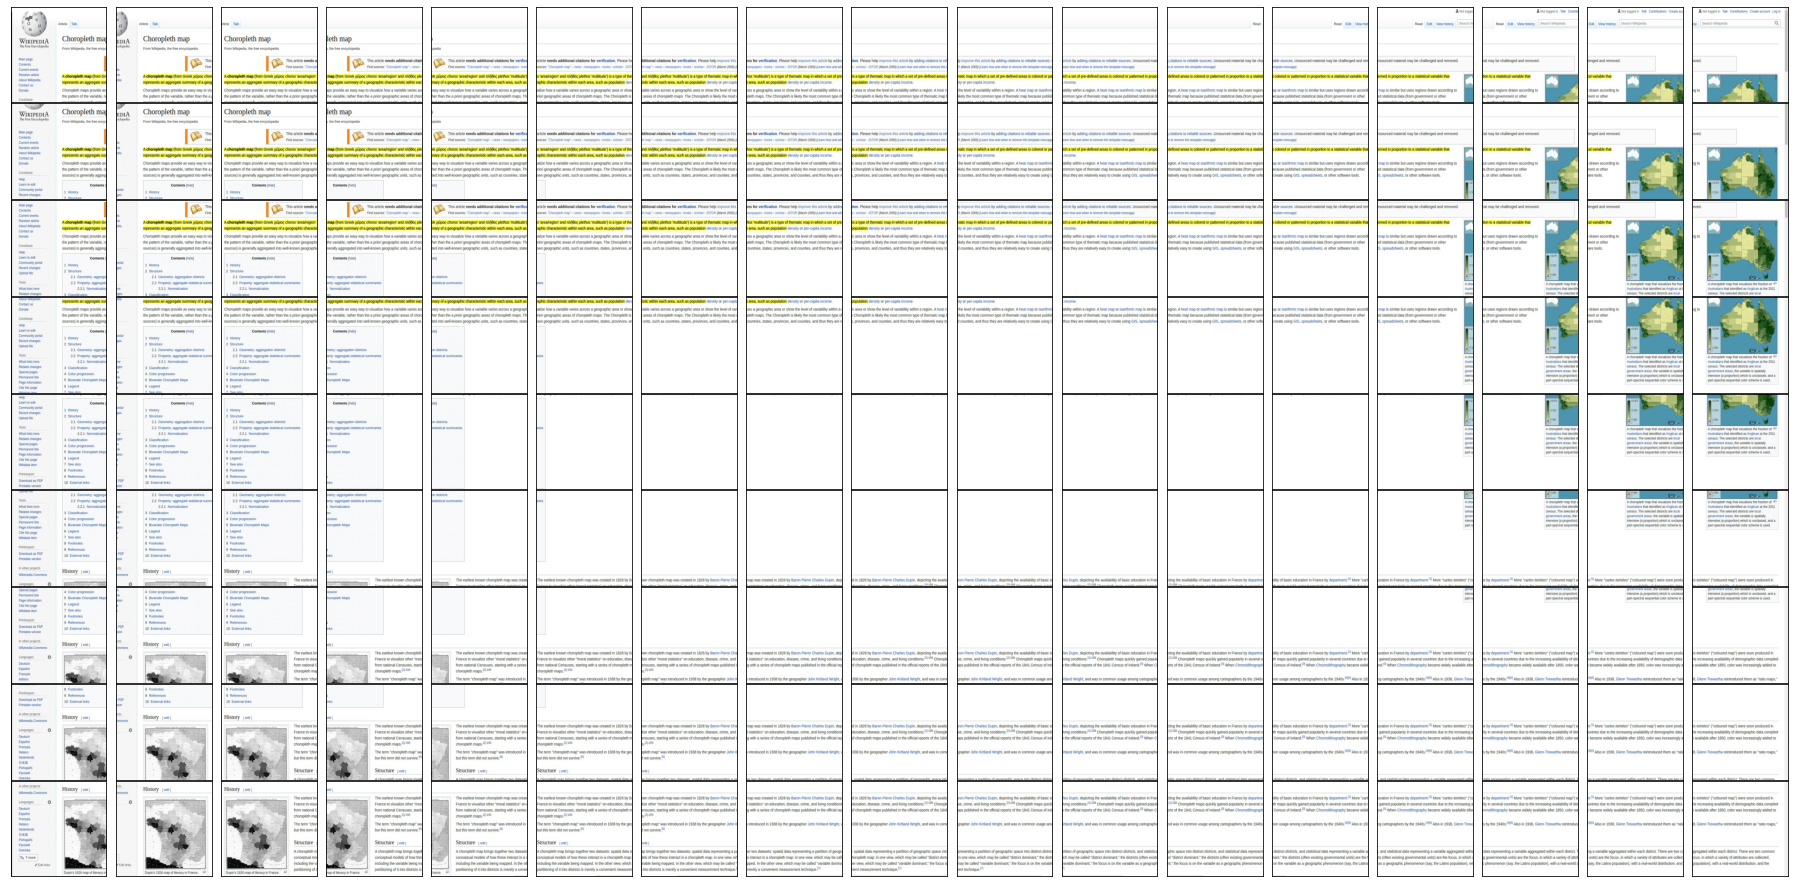

In [12]:
fig, ax = plt.subplots(nrows=9, ncols=17, figsize=(32, 16), gridspec_kw={'hspace': 0.01, 'wspace': 0.01})
for row in range(9):
    for col in range(17):
        ax[row, col].imshow(windows[row, col, 0, ...])
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])
        ax[row, col].set_xticklabels([])
        ax[row, col].set_yticklabels([])
# plt.subplots_adjust(wspace=0.001)
plt.tight_layout(h_pad=0.01)

In [13]:
from matplotlib.gridspec import GridSpec

In [14]:
import segmentation as seg

In [15]:
from tensorflow import keras as K

In [16]:
model = K.models.load_model('vgg16-validated-five-classes.h5')

In [17]:
pred = seg.segment_image(X, model)

In [20]:
pred = pred.numpy()

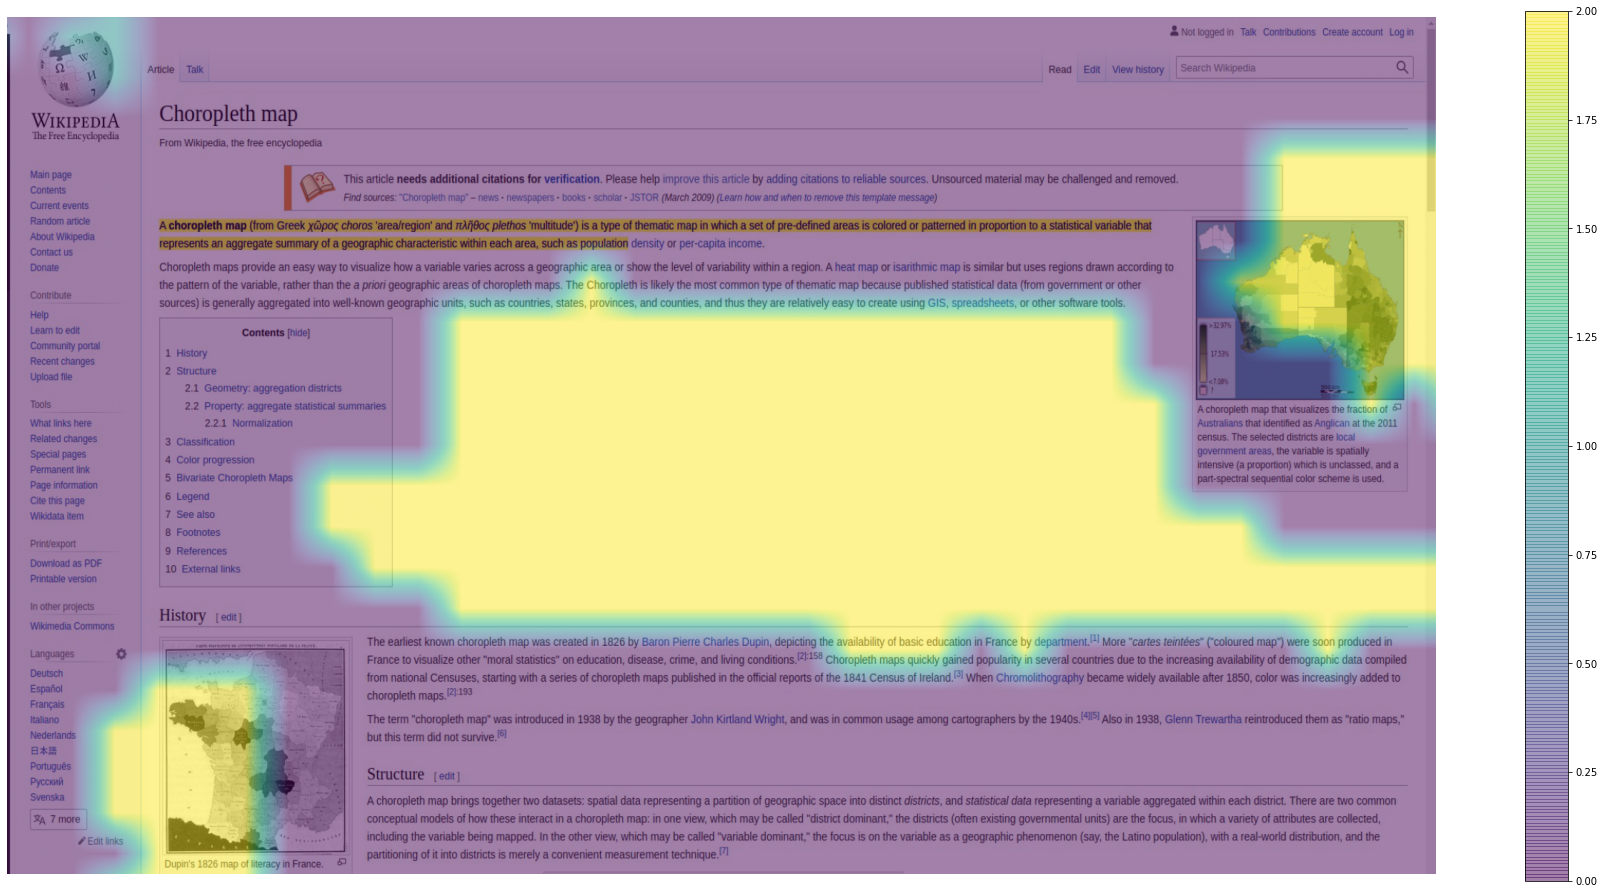

In [21]:
fig, ax = plt.subplots(figsize=(32, 16))
ax.imshow(X)
attention = resize(pred.argmax(axis=-1), X.shape[:2], preserve_range=True, anti_aliasing=False)
mappable = ax.imshow(attention, alpha=0.5, interpolation='none')
ax.set_axis_off()
plt.colorbar(mappable)

In [22]:
from skimage.measure import label, regionprops

(-0.5, 32.5, 20.5, -0.5)

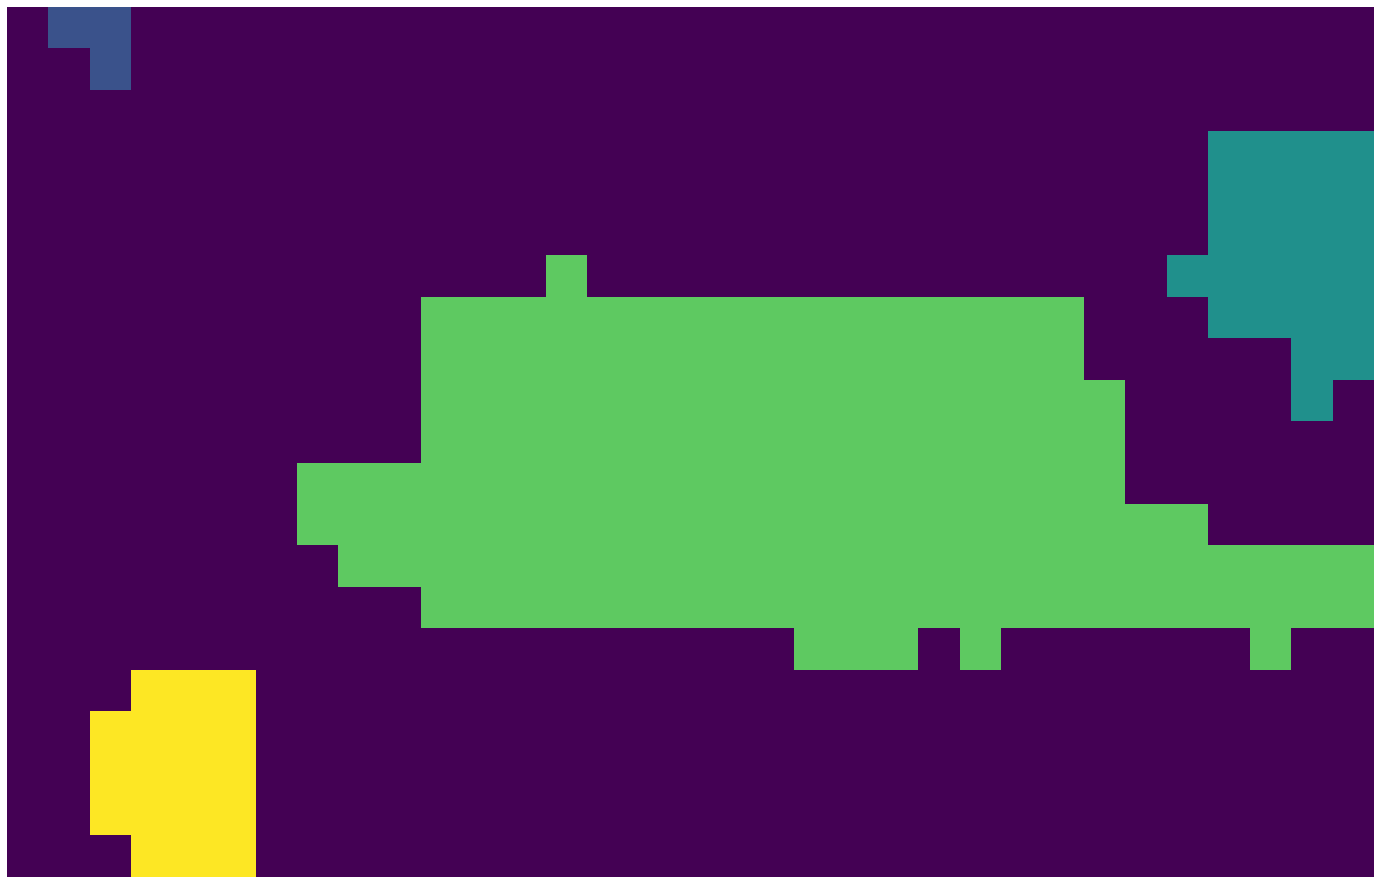

In [23]:
plt.figure(figsize=(32, 16))
plt.imshow(label(pred.argmax(axis=-1)), interpolation='none')
plt.axis('off')

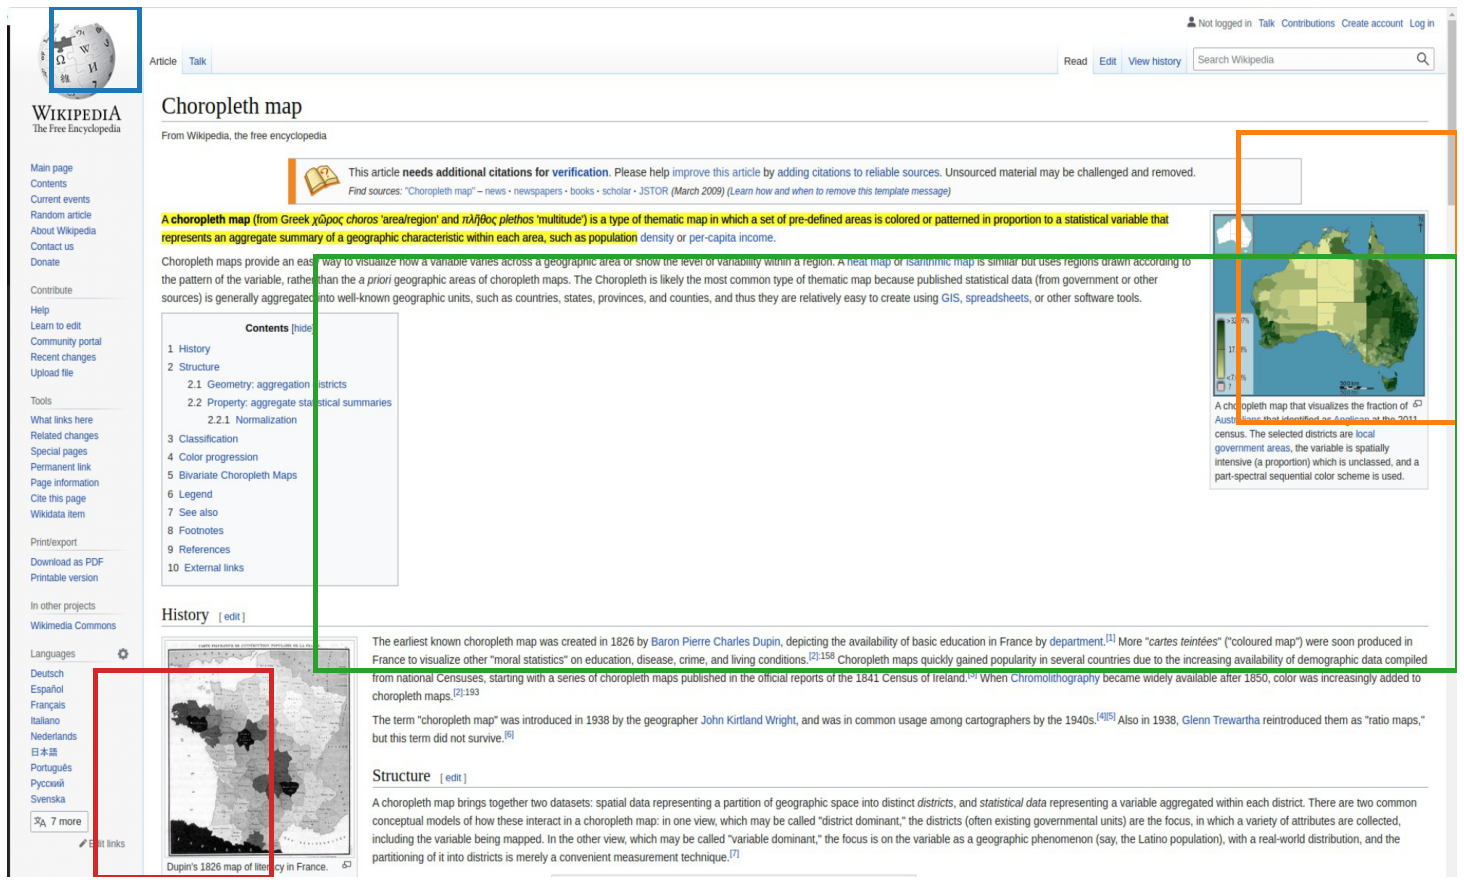

In [26]:
fig, ax = plt.subplots(figsize=(32, 16))
labled = label(pred.argmax(axis=-1))
ax.imshow(X)
for i, region in enumerate(regionprops(labled)):
    minrow, mincol, maxrow, maxcol = region.bbox
    minrow = minrow / labled.shape[0] * X.shape[0]
    mincol = mincol / labled.shape[1] * X.shape[1]
    maxrow = maxrow / labled.shape[0] * X.shape[0]
    maxcol = maxcol / labled.shape[1] * X.shape[1]
    ax.add_patch(Rectangle((mincol, minrow), maxcol - mincol, maxrow - minrow, edgecolor=colors[i], linewidth=5, fill=False))
ax.set_axis_off()

In [157]:
regions = regionprops(labled)

In [159]:
region = regions[0]

In [160]:
region.centroid

(0.3333333333333333, 1.6666666666666667)